In [1]:
!pip install python-mnist

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LassoCV, ElasticNetCV, RidgeCV

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data')
training=mndata.load_training()
testing=mndata.load_testing()

In [4]:
type(training[0])

list

In [5]:
type(training)

tuple

In [6]:
type(testing)

tuple

In [7]:
len(training)

2

In [8]:
len(testing)

2

In [9]:
image = np.array(training[0][5]).reshape((28,28))

In [10]:
image.shape

(28, 28)

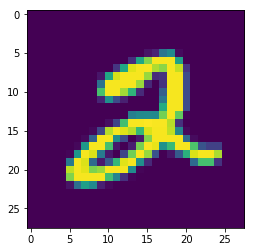

In [11]:
plt.imshow(image)
plt.show()

In [12]:
X_train=pd.DataFrame(training[0])

In [13]:
y_train=list(training[1])# NOT SURE WHETHER THIS NEEDS TO BE LIST OR CAN STAY AN ARRAY

In [14]:
X_train.shape

(60000, 784)

In [15]:
len(y_train)

60000

In [16]:
type(y_train)

list

In [17]:
X_test=pd.DataFrame(testing[0])
y_test=list(testing[1])

In [18]:
X_test.shape

(10000, 784)

In [19]:
len(y_test)

10000

In [20]:
type(y_test)

list

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X_train['label']=y_train #adding y to x

In [23]:
#we can say that labels are equally distributed- around 10%
print('Train label distribution\n{}'.format(X_train.label.value_counts(normalize=True)))

Train label distribution
1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: label, dtype: float64


In [24]:
X_train.isnull().values.any()

False

In [25]:
df_stats=X_train.describe().T

In [26]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,60000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
df_stats[df_stats['std']==0]

,count,mean,std,min,25%,50%,75%,max
0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we have 67 cases where the values are always zeros; maybe I should remove those columns

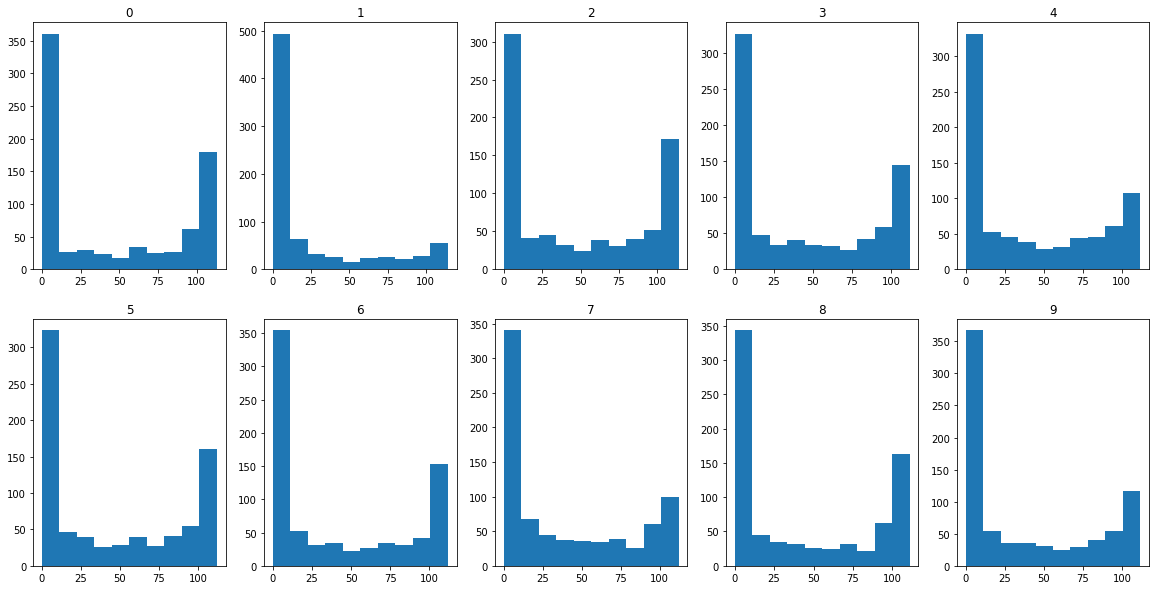

In [28]:
fig = plt.figure(figsize=(20, 10))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.hist(X_train[X_train['label']==i].describe().T['std'])
    plt.title(i)

plt.show()

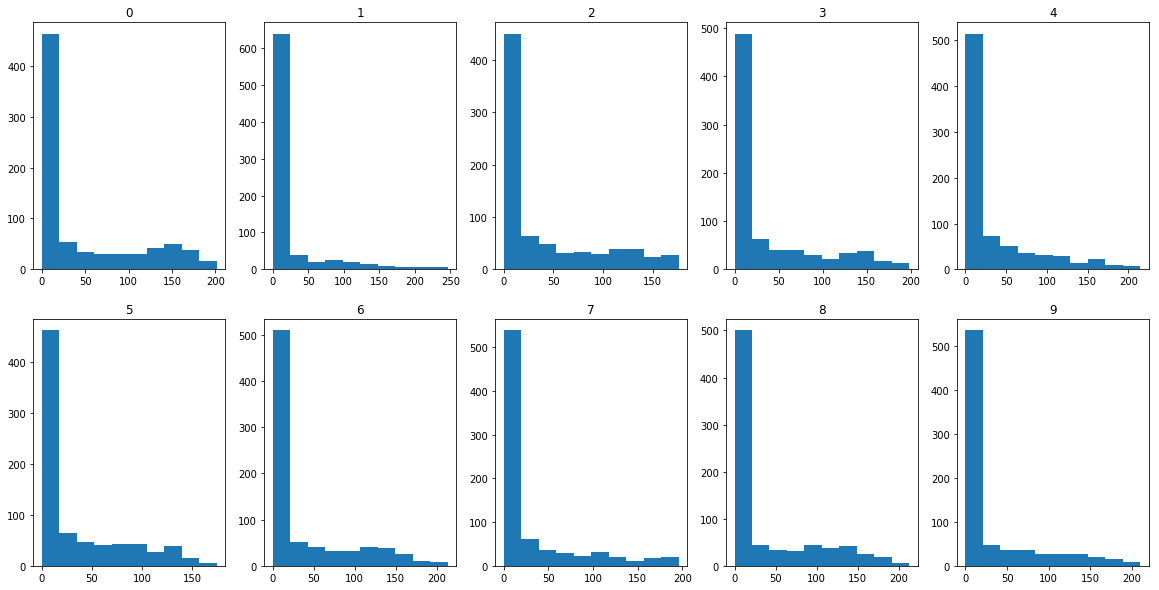

In [29]:
fig = plt.figure(figsize=(20, 10))

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.hist(X_train[X_train['label']==i].describe().T['mean'])
    plt.title(i)

plt.show()

create a sample -10%

In [30]:
X_sample= X_train.sample(frac=.1)

In [31]:
X_sample.shape

(6000, 785)

In [32]:
y_sample=X_sample['label']

In [33]:
X_sample.drop(['label'],axis=1, inplace=True)

In [34]:
LR= LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [35]:
LR.fit(X_sample,y_sample)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
LR.score(X_test,y_test)

0.87880000000000003

In [37]:
LR.score(X_sample, y_sample)

1.0

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
y_pred=LR.predict(X_test)

In [40]:
LR.predict_proba(X_test)

array([[  9.50975535e-043,   1.12578007e-089,   5.51388180e-038, ...,
          1.00000000e+000,   4.44812098e-028,   1.43134336e-026],
       [  3.89883756e-038,   3.33242784e-053,   1.00000000e+000, ...,
          7.39016221e-125,   6.05588772e-027,   1.57733978e-079],
       [  3.58442747e-032,   9.99999901e-001,   9.91451790e-008, ...,
          8.51706560e-019,   1.83484336e-012,   8.62289740e-016],
       ..., 
       [  4.69988725e-055,   1.52130463e-056,   1.18235063e-040, ...,
          1.07610178e-022,   3.29163638e-019,   3.83402742e-022],
       [  1.39118061e-038,   1.63499242e-041,   7.17121787e-034, ...,
          1.26136204e-053,   5.08393630e-014,   3.26358832e-038],
       [  1.17462330e-030,   2.81834395e-077,   1.98423160e-033, ...,
          1.82994167e-079,   2.72181492e-059,   1.05508303e-059]])

In [41]:
LR.predict_log_proba(X_test)

array([[ -9.67588408e+01,  -2.04811597e+02,  -8.57909647e+01, ...,
          0.00000000e+00,  -6.29799008e+01,  -5.95085990e+01],
       [ -8.61375551e+01,  -1.20833309e+02,   0.00000000e+00, ...,
         -2.85822987e+02,  -6.03687665e+01,  -1.81448483e+02],
       [ -7.24061242e+01,  -9.91474513e-08,  -1.61266806e+01, ...,
         -4.16070449e+01,  -2.70240620e+01,  -3.46869403e+01],
       ..., 
       [ -1.25094642e+02,  -1.28525197e+02,  -9.19358992e+01, ...,
         -5.05835270e+01,  -4.25577319e+01,  -4.93129563e+01],
       [ -8.71680808e+01,  -9.39143506e+01,  -7.63178177e+01, ...,
         -1.21804818e+02,  -3.06101055e+01,  -8.63154062e+01],
       [ -6.89166053e+01,  -1.76262903e+02,  -7.53000763e+01, ...,
         -1.81299938e+02,  -1.34851222e+02,  -1.35798901e+02]])

In [42]:
confusion_matrix=confusion_matrix(y_test, y_pred)

In [43]:
!pip install seaborn

    100% |################################| 184kB 4.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /root/.cache/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


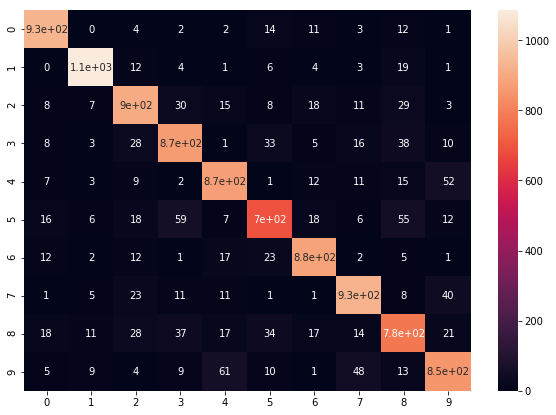

In [44]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

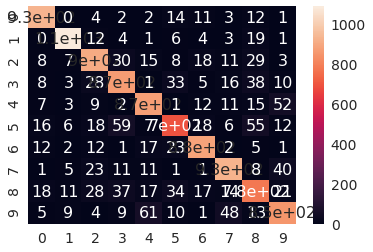

In [45]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

     
df_cm = pd.DataFrame(confusion_matrix, range(10),
                  range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [46]:
coef=LR.coef_[LR.coef_!=0]

In [47]:
coef

array([  2.02460964e-08,   2.85717679e-08,   9.13760607e-08, ...,
         7.24106074e-04,  -1.25294678e-04,  -2.86105957e-05])

In [48]:
coef.shape

(6730,)

In [49]:
LR.coef_.shape

(10, 784)

In [50]:
7840-6570

1270

1270 of the features are with coeficents 0

In [51]:
importance_indices = np.argsort(np.abs(coef))

In [52]:
importance_indices[-100:-1]

array([3600, 2231, 6269, 4356, 3002, 4977, 2995, 6451, 3672, 2424, 6402,
       2486, 2071, 2243, 3824, 2512, 3562, 3854, 2147, 4919, 2296, 3499,
       6626, 2467, 2840, 5289, 2219, 5103, 5312, 6398, 4815, 3052, 1785,
       5017, 3005, 6571, 2335, 1418, 3838, 1295, 2123, 2608, 5120, 3748,
       2122, 5235, 1120, 4992, 5099, 2334, 4477, 1771, 1766, 5623, 6229,
        337, 4838, 6375, 5199, 2356, 3796, 1647, 5010, 3744, 2634, 5308,
       3543, 2427, 4969, 5763, 2230, 5178, 2640, 1649, 1796, 1926, 3597,
       1596, 5985, 5616, 5699, 3804, 3182, 5333, 5076, 3655, 4243, 5018,
       1495, 1851, 1505, 3893, 5634, 5044,  985, 3007, 3656, 3632, 3605])

the 100 most important features

In [53]:
KNN=KNeighborsClassifier()

In [54]:
KNN.fit(X_sample,y_sample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
KNN.score(X_test,y_test)

0.94099999999999995

In [56]:
KNN.score(X_sample,y_sample)

0.95899999999999996